## 100 Movies of All Time Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import the data
movies = pd.read_csv('/content/Top_100_Movies.csv')

In [3]:
movies.head()

,Unnamed: 0,rank,title,description,genre,rating,id,year,imdbid,imdb_link,image
0,0,1,The Shawshank Redemption,Two imprisoned men bond over a number of years...,['Drama'],9.3,top1,1994,tt0111161,https://www.imdb.com/title/tt0111161,https://m.media-amazon.com/images/M/MV5BMDFkYT...
1,1,2,The Godfather,The aging patriarch of an organized crime dyna...,"['Crime', 'Drama']",9.2,top2,1972,tt0068646,https://www.imdb.com/title/tt0068646,https://m.media-amazon.com/images/M/MV5BM2MyNj...
2,2,3,The Dark Knight,When the menace known as the Joker wreaks havo...,"['Action', 'Crime', 'Drama']",9.0,top3,2008,tt0468569,https://www.imdb.com/title/tt0468569,https://m.media-amazon.com/images/M/MV5BMTMxNT...
3,3,4,The Godfather Part II,The early life and career of Vito Corleone in ...,"['Crime', 'Drama']",9.0,top4,1974,tt0071562,https://www.imdb.com/title/tt0071562,https://m.media-amazon.com/images/M/MV5BMWMwMG...
4,4,5,12 Angry Men,The jury in a New York City murder trial is fr...,"['Crime', 'Drama']",9.0,top5,1957,tt0050083,https://www.imdb.com/title/tt0050083,https://m.media-amazon.com/images/M/MV5BMWU4N2...


In [5]:
# cleaning
movies = movies.drop(["Unnamed: 0" , "id" , "imdbid" , "image",'imdb_link'] , axis=1)
movies.set_index('title')
movies['genre'] = movies['genre'].str.strip().replace(r'[\]\[\'"]','',regex=True)

In [6]:
movies.head()

,rank,title,description,genre,rating,year
0,1,The Shawshank Redemption,Two imprisoned men bond over a number of years...,Drama,9.3,1994
1,2,The Godfather,The aging patriarch of an organized crime dyna...,"Crime, Drama",9.2,1972
2,3,The Dark Knight,When the menace known as the Joker wreaks havo...,"Action, Crime, Drama",9.0,2008
3,4,The Godfather Part II,The early life and career of Vito Corleone in ...,"Crime, Drama",9.0,1974
4,5,12 Angry Men,The jury in a New York City murder trial is fr...,"Crime, Drama",9.0,1957


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         100 non-null    int64  
 1   title        100 non-null    object 
 2   description  100 non-null    object 
 3   genre        100 non-null    object 
 4   rating       100 non-null    float64
 5   year         100 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


In [8]:
movies.describe()

,rank,rating,year
count,100.000000,100.00000,100.000000
mean,50.500000,8.52200,1988.070000
std,29.011492,0.20869,23.069178
min,1.000000,8.30000,1931.000000
25%,25.750000,8.40000,1974.750000
50%,50.500000,8.50000,1994.000000
75%,75.250000,8.60000,2003.250000
max,100.000000,9.30000,2023.000000


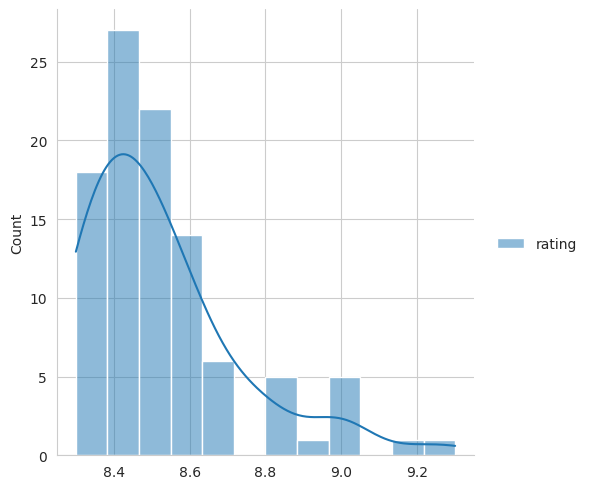

,count
rating,
8.4,27
8.5,22
8.3,18
8.6,14
8.7,6
9.0,5
8.8,5
9.3,1
9.2,1


In [9]:
sns.set_style('whitegrid')
sns.displot(movies[['rating']] ,kde=True)
plt.show()
movies['rating'].value_counts()

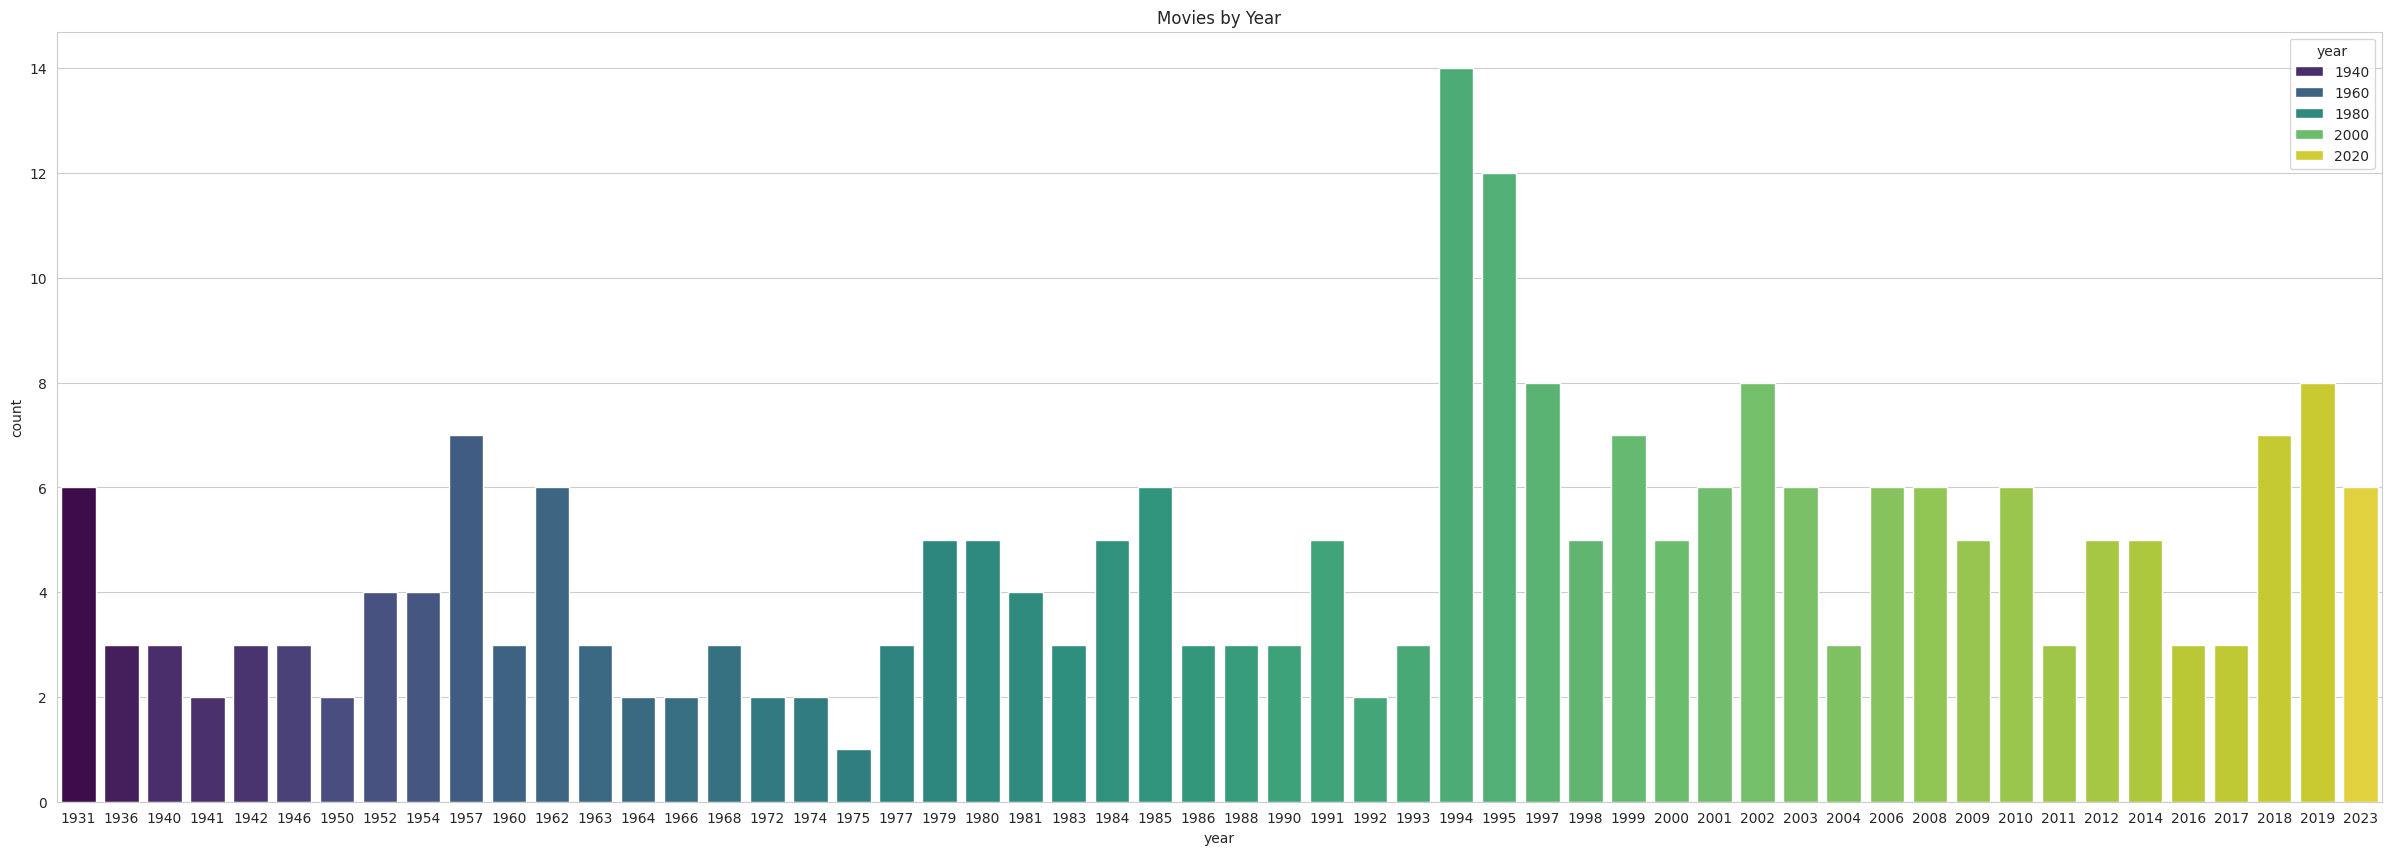

In [38]:
# movies by year
plt.figure(figsize=(30,10))
sns.countplot(data=movies, x='year', hue = 'year', palette='viridis')
plt.title('Movies by Year')
plt.show()

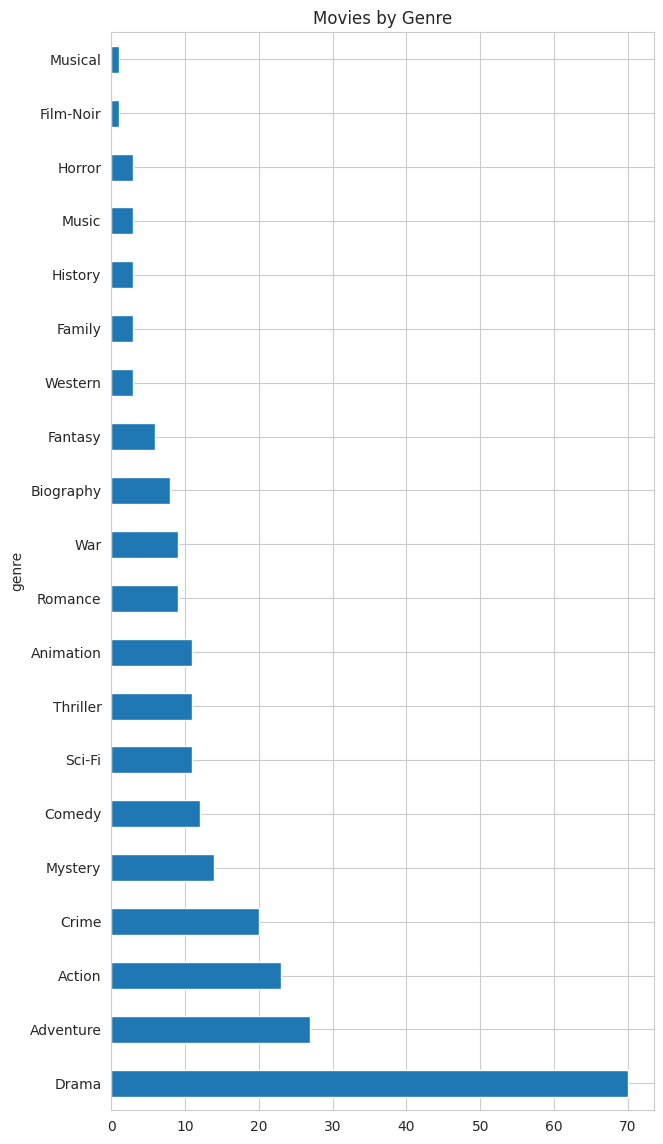

In [39]:
# movies by genre
gen = movies['genre'].value_counts()
plt.figure(figsize=(7,14))
plt.title('Movies by Genre')
gen.plot(kind='barh')
plt.show()

In [19]:
movies['genre'] = movies['genre'].str.strip()
movies['genre'] = movies['genre'].str.split(', ')
movies = movies.explode('genre')
genre = movies[['genre']].value_counts()

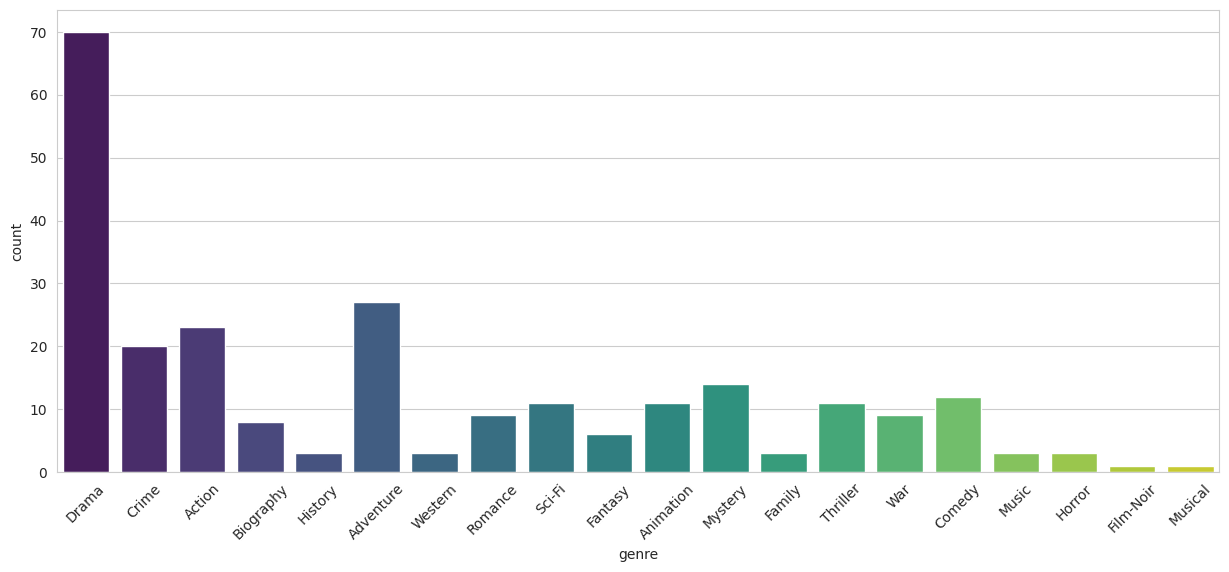

,count
genre,
Drama,70
Adventure,27
Action,23
Crime,20
Mystery,14
Comedy,12
Animation,11
Thriller,11
Sci-Fi,11


In [21]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.countplot(x='genre' , data=movies, hue='genre', palette='viridis')
plt.show()
genre

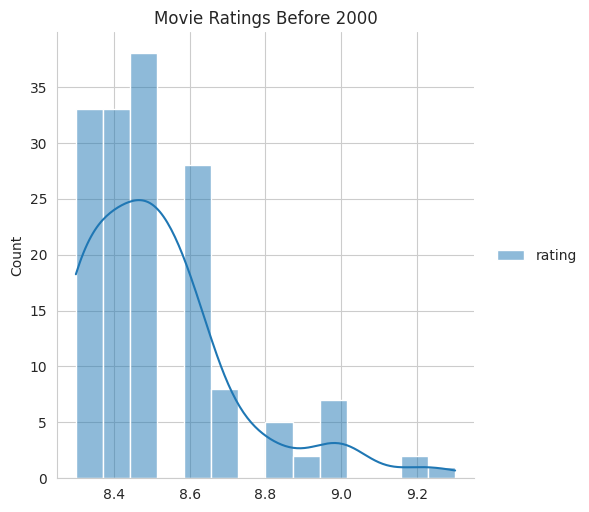

,count
rating,
8.3,33
8.4,33
8.5,38
8.6,28
8.7,8
8.8,5
8.9,2
9.0,7
9.2,2


In [40]:
# movies before 2000
ratings_1 = movies.query("year < 2000")[['rating']]
sns.displot(ratings_1,kde=True)
plt.title("Movie Ratings Before 2000")
plt.show()
ratings_1.value_counts().sort_index()

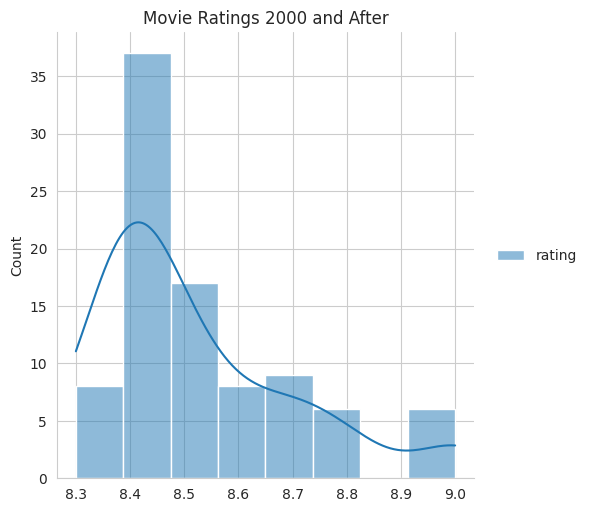

,count
rating,
8.3,8
8.4,37
8.5,17
8.6,8
8.7,9
8.8,6
9.0,6


In [41]:
# Movie ratings after 2000
ratings_2=movies.query("year >= 2000")[['rating']]
sns.displot(ratings_2,kde=True)
plt.title("Movie Ratings 2000 and After")
plt.show()
ratings_2.value_counts().sort_index()

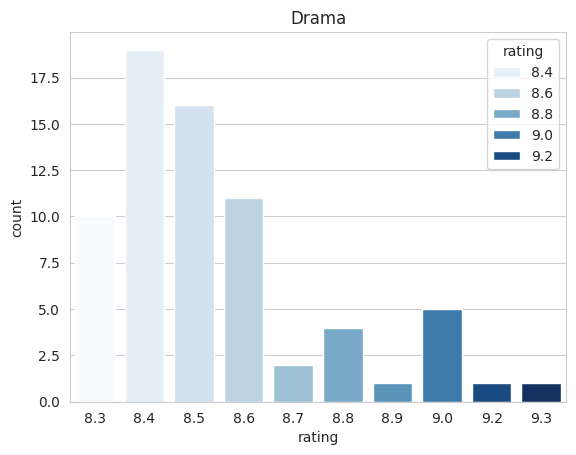

rating
8.3    10
8.4    19
8.5    16
8.6    11
8.7     2
8.8     4
8.9     1
9.0     5
9.2     1
9.3     1
Name: count, dtype: int64


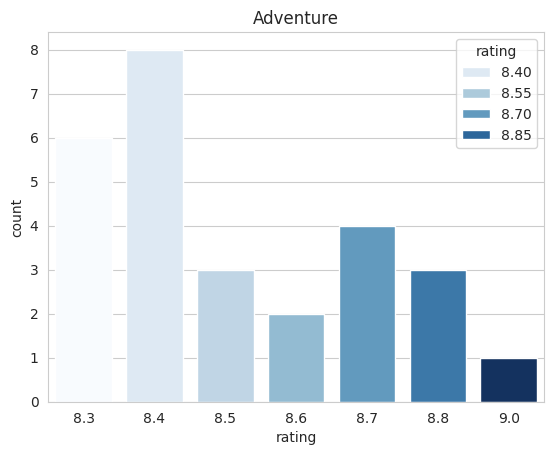

rating
8.3    6
8.4    8
8.5    3
8.6    2
8.7    4
8.8    3
9.0    1
Name: count, dtype: int64


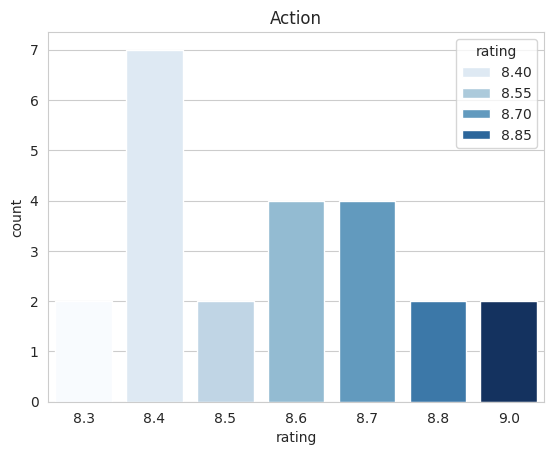

rating
8.3    2
8.4    7
8.5    2
8.6    4
8.7    4
8.8    2
9.0    2
Name: count, dtype: int64


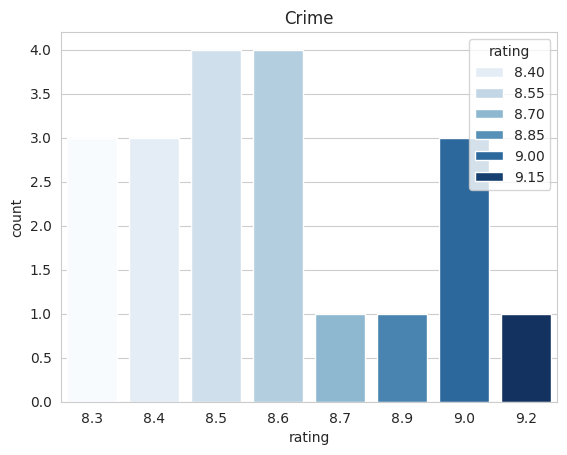

rating
8.3    3
8.4    3
8.5    4
8.6    4
8.7    1
8.9    1
9.0    3
9.2    1
Name: count, dtype: int64


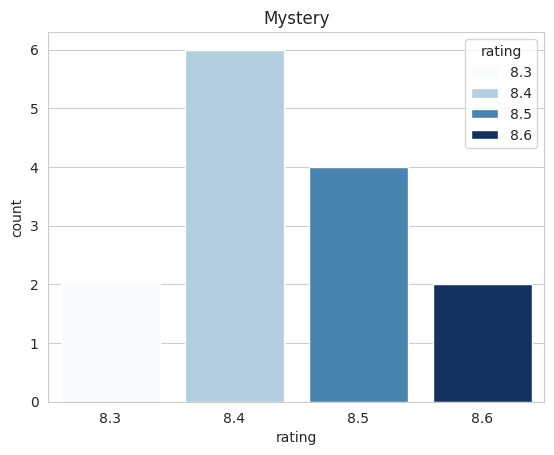

rating
8.3    2
8.4    6
8.5    4
8.6    2
Name: count, dtype: int64


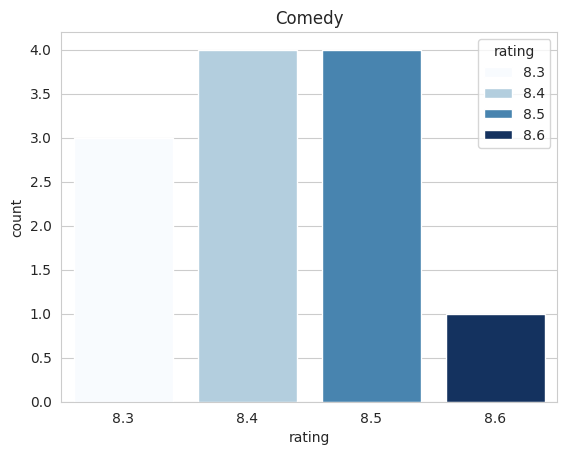

rating
8.3    3
8.4    4
8.5    4
8.6    1
Name: count, dtype: int64


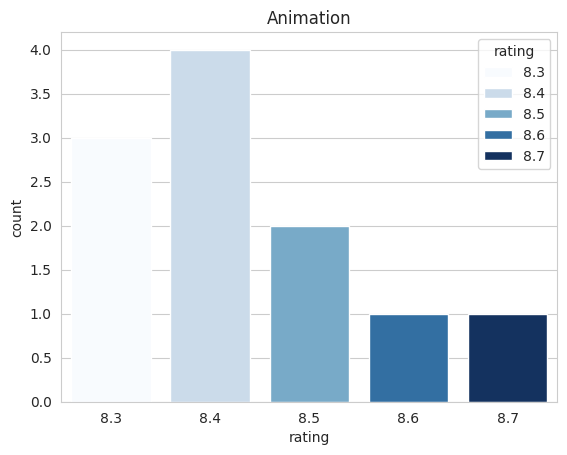

rating
8.3    3
8.4    4
8.5    2
8.6    1
8.7    1
Name: count, dtype: int64


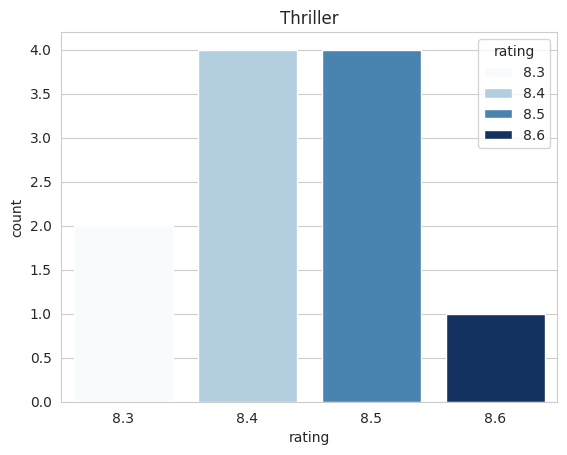

rating
8.3    2
8.4    4
8.5    4
8.6    1
Name: count, dtype: int64


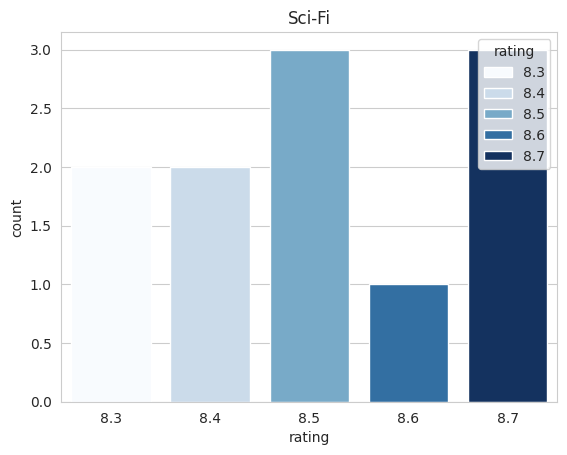

rating
8.3    2
8.4    2
8.5    3
8.6    1
8.7    3
Name: count, dtype: int64


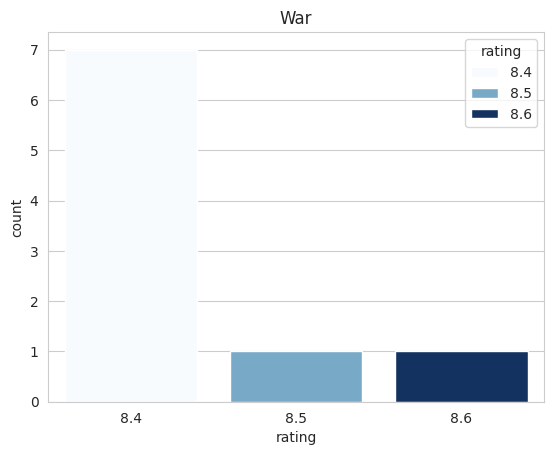

rating
8.4    7
8.5    1
8.6    1
Name: count, dtype: int64


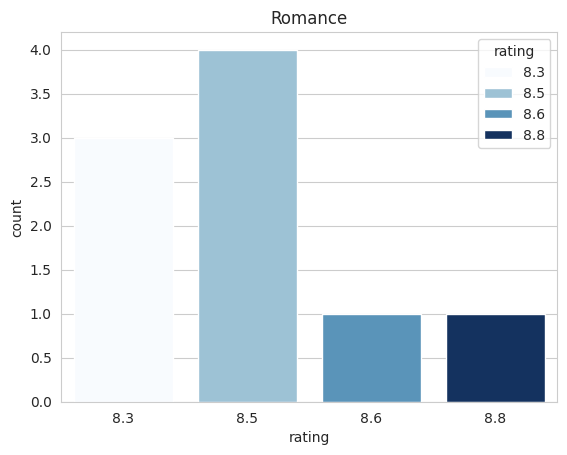

rating
8.3    3
8.5    4
8.6    1
8.8    1
Name: count, dtype: int64


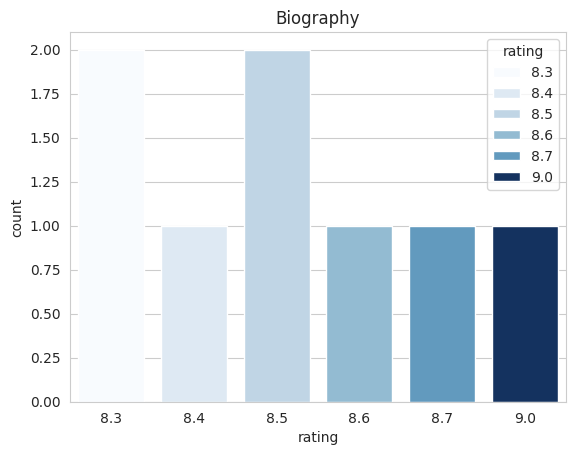

rating
8.3    2
8.4    1
8.5    2
8.6    1
8.7    1
9.0    1
Name: count, dtype: int64


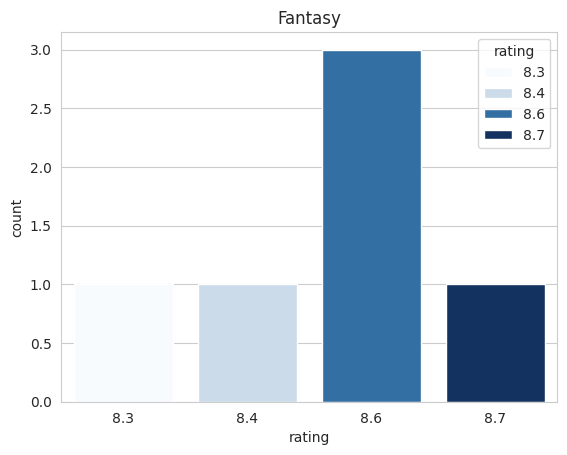

rating
8.3    1
8.4    1
8.6    3
8.7    1
Name: count, dtype: int64


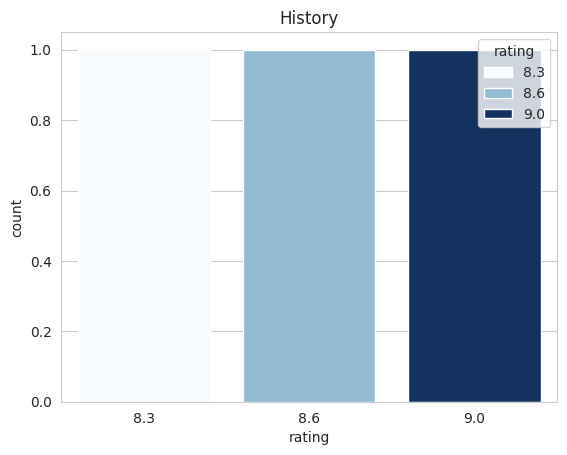

rating
8.3    1
8.6    1
9.0    1
Name: count, dtype: int64


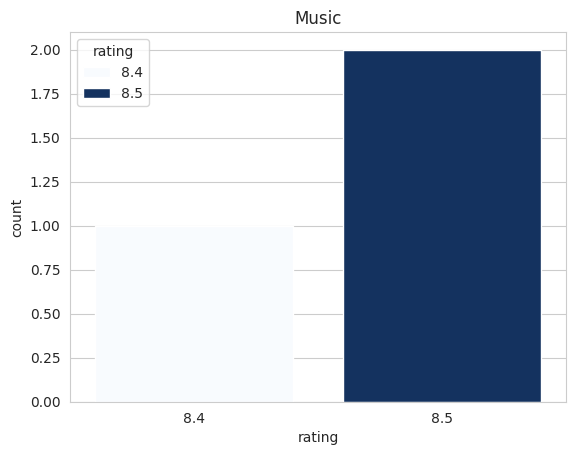

rating
8.4    1
8.5    2
Name: count, dtype: int64


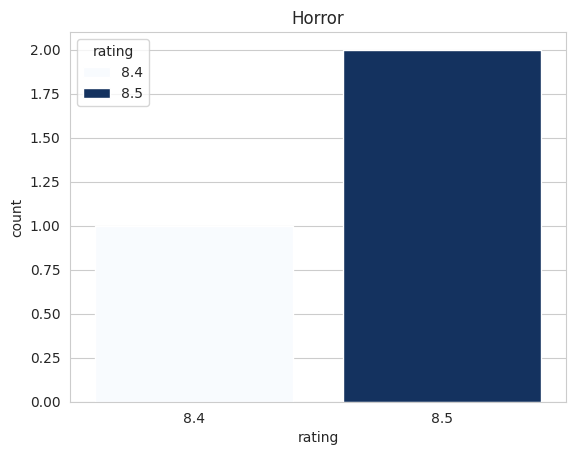

rating
8.4    1
8.5    2
Name: count, dtype: int64


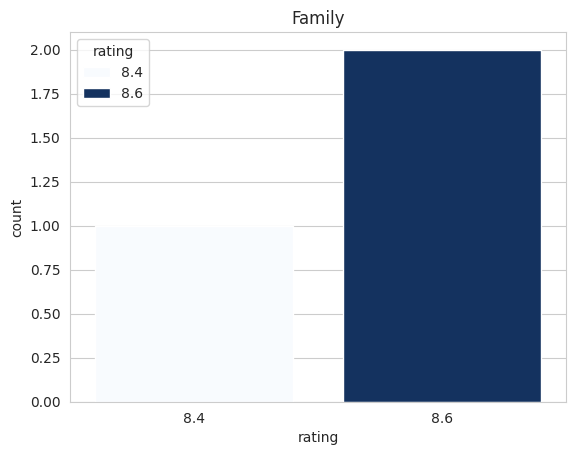

rating
8.4    1
8.6    2
Name: count, dtype: int64


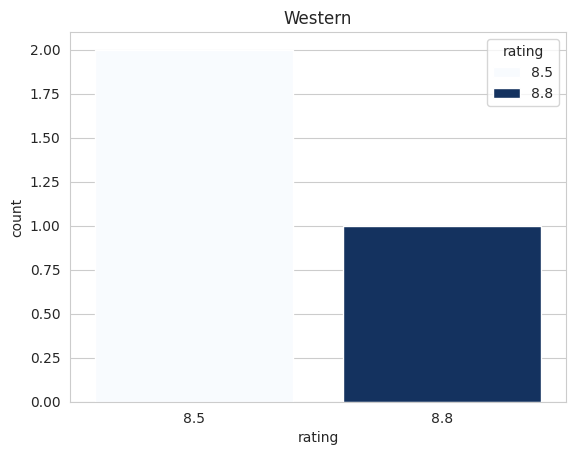

rating
8.5    2
8.8    1
Name: count, dtype: int64


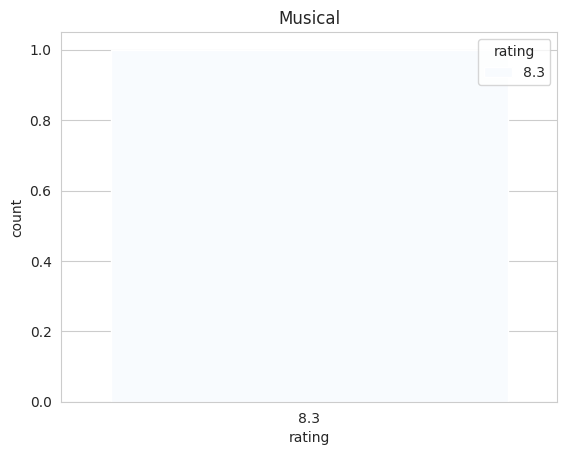

rating
8.3    1
Name: count, dtype: int64


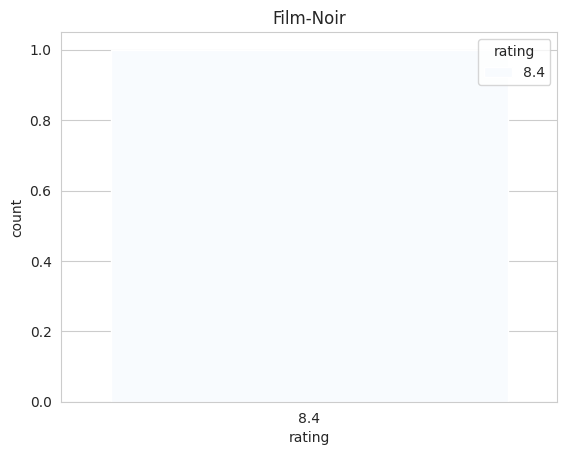

rating
8.4    1
Name: count, dtype: int64


In [30]:
# movie ratings by each genre
genres = ['Drama','Adventure','Action','Crime','Mystery','Comedy','Animation','Thriller','Sci-Fi','War','Romance','Biography','Fantasy','History','Music','Horror','Family','Western','Musical','Film-Noir']
for i in genres:
    ratings_3=movies.query(f"genre == '{i}'")
    sns.countplot(x='rating' , data=ratings_3, hue='rating', palette = 'Blues')
    plt.title(f"{i}")
    plt.show()
    print(ratings_3['rating'].value_counts().sort_index())

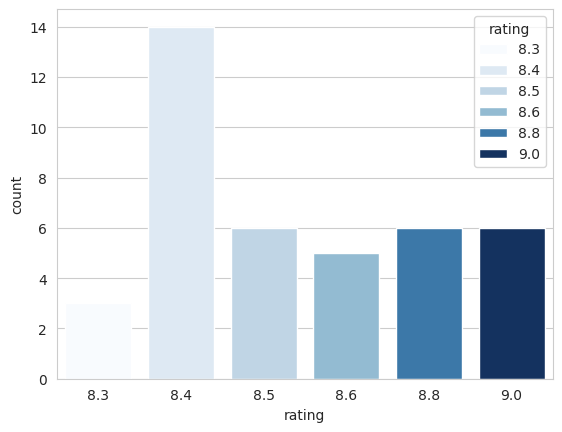

,title,genre,rating,year
2,The Dark Knight,Action,9.0,2008
2,The Dark Knight,Crime,9.0,2008
2,The Dark Knight,Drama,9.0,2008
6,The Lord of the Rings: The Return of the King,Action,9.0,2003
6,The Lord of the Rings: The Return of the King,Adventure,9.0,2003
6,The Lord of the Rings: The Return of the King,Drama,9.0,2003
8,The Lord of the Rings: The Fellowship of the Ring,Action,8.8,2001
8,The Lord of the Rings: The Fellowship of the Ring,Adventure,8.8,2001
8,The Lord of the Rings: The Fellowship of the Ring,Drama,8.8,2001
12,The Lord of the Rings: The Two Towers,Action,8.8,2002


In [31]:
# movie ratings from 2000-2010
ratings_4=movies.query("2000 < year < 2010")
sns.countplot(x='rating' , data=ratings_4, hue='rating', palette = 'Blues')
plt.title("Movie Ratings 2000-2010")
plt.show()
ratings_4[['title','genre' , 'rating' , 'year']]

<ipython-input-37-a6b818707d80>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating' , data=movies, palette='Blues')


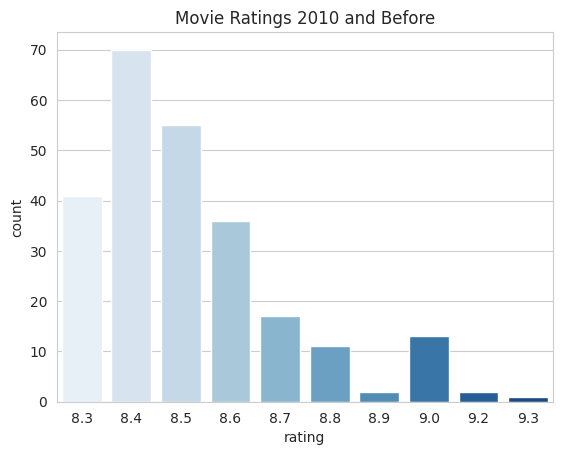

,title,genre,rating,year
0,The Shawshank Redemption,Drama,9.3,1994
1,The Godfather,Crime,9.2,1972
1,The Godfather,Drama,9.2,1972
2,The Dark Knight,Action,9.0,2008
2,The Dark Knight,Crime,9.0,2008
...,...,...,...,...
98,Citizen Kane,Drama,8.3,1941
98,Citizen Kane,Mystery,8.3,1941
99,M,Crime,8.3,1931
99,M,Mystery,8.3,1931


In [37]:
# movie ratings before 2010
ratings_5=movies.query("year > 2010")
sns.countplot(x='rating' , data=movies, palette='Blues')
plt.title("Movie Ratings 2010 and Before")
plt.show()
movies[['title','genre' , 'rating' , 'year']]